# Clustering: K-Means Clustering

## import modules

In [8]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

## Generate Data

We firstly randomly generate data from 4 clusters

(800, 2)


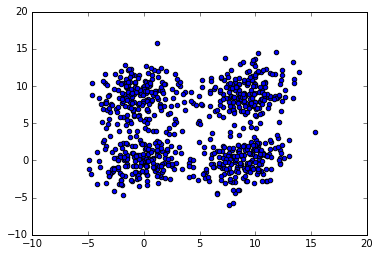

In [9]:
np.random.seed(42)

def init(n, center):
    data = np.random.multivariate_normal(center, [[4, 1], [1, 4]], size=[n,])
    return data

data = np.concatenate((init(200, [9, 0]), init(200, [9, 9]), init(200, [0, 9]), init(200, [0, 0])),)

print(data.shape)
plt.scatter(data[:,0], data[:,1])
plt.show()

## KMeans Clustering

In [10]:
# plot the kmeans results
def kmeans_plot(data, kmeans):
    h = .02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')
    plt.plot(data[:, 0], data[:, 1], 'k.', markersize=2)

    centroids = kmeans.cluster_centers_ # get the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

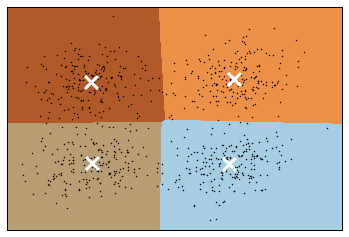

Sum of distances to the centroids: 6000.446294702526


In [11]:
## n_clusters: Number of clusters
## max_iter: Maximum number of iterations of the k-means algorithm for a single run.
## n_init: Number of time the k-means algorithm will be run with different centroid seeds.
## init: How to select initial centers
kmeans = KMeans(n_clusters = 4, max_iter = 100, n_init = 10, init='k-means++', random_state=42)
kmeans.fit(data)
kmeans_plot(data, kmeans)
print('Sum of distances to the centroids: {}'.format(kmeans.inertia_))

## Convergence of KMeans

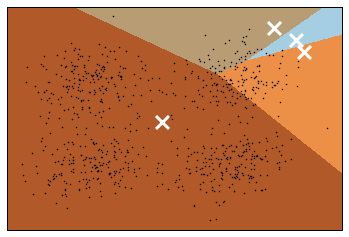

Sum of distances to the centroids: 33212.04811201549


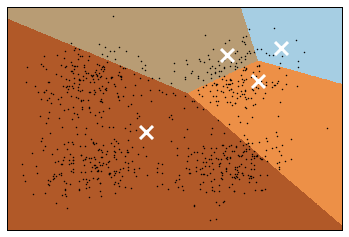

Sum of distances to the centroids: 26375.361144357335


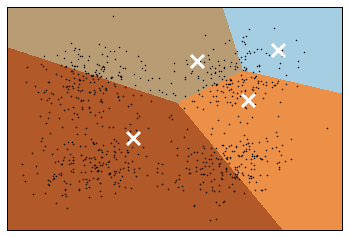

Sum of distances to the centroids: 21958.14444974088


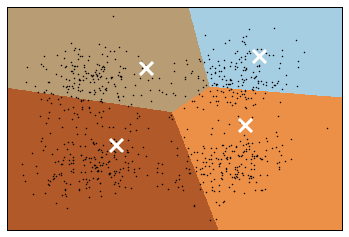

Sum of distances to the centroids: 13393.587390493503


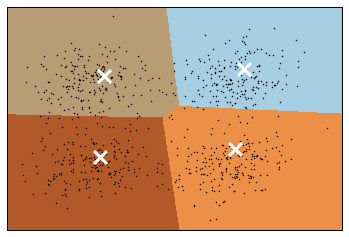

Sum of distances to the centroids: 7059.640912441712


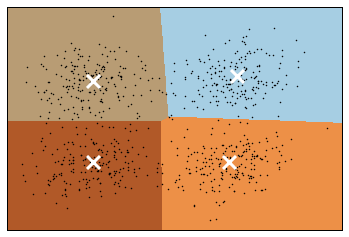

Sum of distances to the centroids: 6041.048659959708


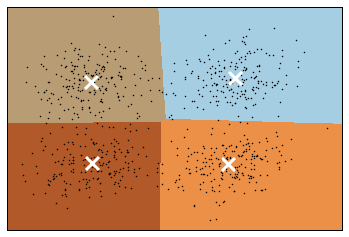

Sum of distances to the centroids: 6003.121308761287


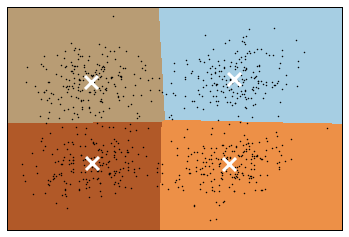

Sum of distances to the centroids: 6000.446294702526


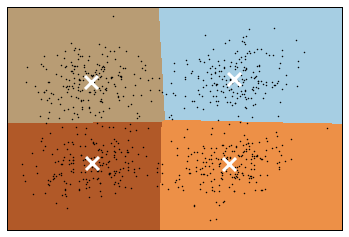

Sum of distances to the centroids: 6000.446294702526


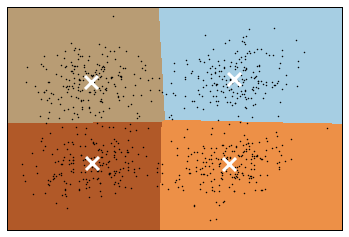

Sum of distances to the centroids: 6000.446294702526


In [12]:
init_array = np.asarray([[-10, -10], [-9, -10], [-10, -9], [-9, -9]])

for i in range(10):
    #kmeans = KMeans(n_clusters = 4, max_iter = i+1, n_init = 1, init='k-means++', random_state=42)
    #kmeans = KMeans(n_clusters = 4, max_iter = i+1, n_init = 1, init='random', random_state=42)
    kmeans = KMeans(n_clusters = 4, max_iter = i+1, n_init = 1, init=init_array, random_state=42)
    kmeans.fit(data)
    kmeans_plot(data, kmeans)
    print('Sum of distances to the centroids: {}'.format(kmeans.inertia_))

## KMeans with different number of clusters

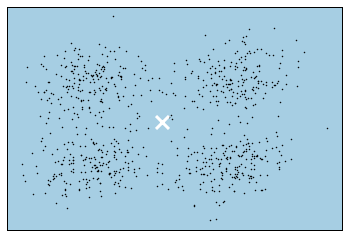

Sum of distances to the centers: 39170.27060105717


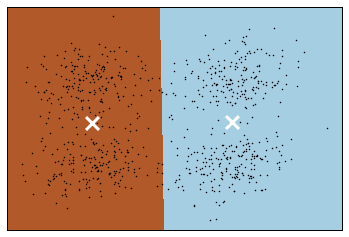

Sum of distances to the centers: 21816.904690713964


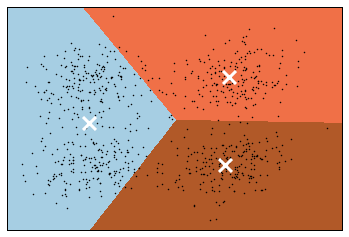

Sum of distances to the centers: 13188.873581668335


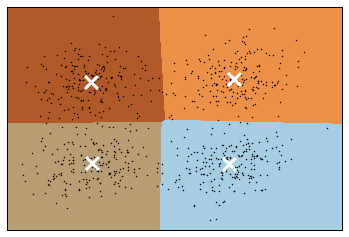

Sum of distances to the centers: 6000.446294702526


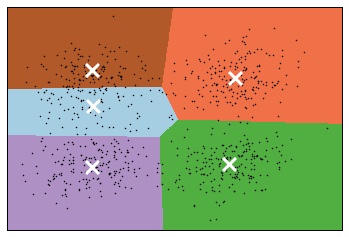

Sum of distances to the centers: 5343.385885101858


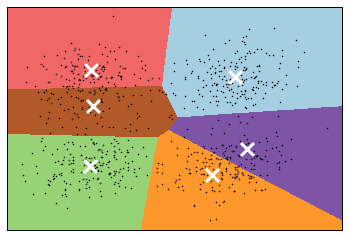

Sum of distances to the centers: 4700.905596456336


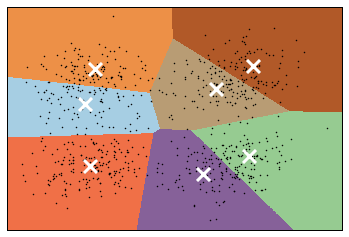

Sum of distances to the centers: 4117.372937116729


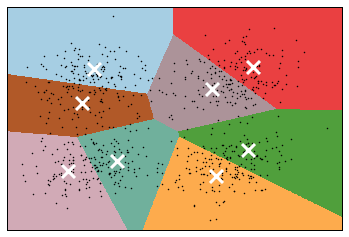

Sum of distances to the centers: 3638.4756241441314


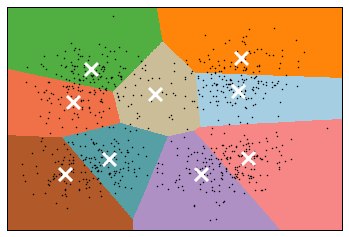

Sum of distances to the centers: 3277.8398982437816


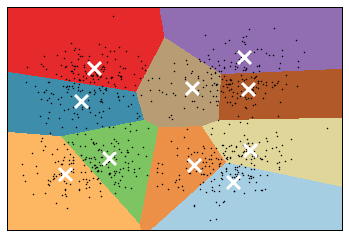

Sum of distances to the centers: 3017.22249671582


In [13]:
for i in range(10):
    kmeans = KMeans(n_clusters = i+1, max_iter = 300, n_init = 20, init='k-means++', random_state=42)
    kmeans.fit(data)
    kmeans_plot(data, kmeans)
    print('Sum of distances to the centers: {}'.format(kmeans.inertia_))

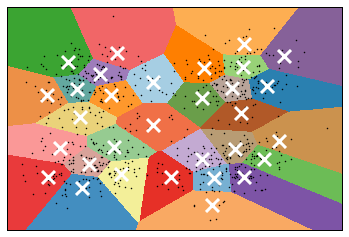

Sum of distances to the centers: 1000.9243321414413


In [14]:
i = 30
kmeans = KMeans(n_clusters = i+1, max_iter = 300, n_init = 20, init='k-means++', random_state=42)
kmeans.fit(data)
kmeans_plot(data, kmeans)
print('Sum of distances to the centers: {}'.format(kmeans.inertia_))